## Analyzing & Predicting Tech Stocks
In this project, I will use pandas to analyze key financial metrics—such as value, risk, and returns—of major FAANG companies: Facebook (Meta), Apple, Amazon, Netflix, and Google (Alphabet).

#### This analysis will explore several key questions, including:
1. What was the change in our stock’s price over time?
2. What was the moving average of our stocks?
3. What was the daily return average of a stock?
4. What was the correlation between the daily returns of different stocks?
5. How much value do we put at risk by investing in a particular stock?
6. How can we attempt to predict future 'FAANG'-stock behaviour?

In [71]:
from __future__ import division
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

# Visualization Imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from datetime import datetime
import yfinance as yf # to access Yahoo Historical Stocks

In [72]:
stock_list = ['META', 'AAPL', 'AMZN', 'NFLX', 'GOOGL']

end = datetime.now()
start = datetime(end.year-1, end.month, end.day) # data will be extracted for an year, from the date of execution

for stock in stock_list:
    globals()[stock] = yf.download(stock, start, end, auto_adjust = False)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [6]:
GOOGL.describe()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL
count,249.000000,249.000000,249.000000,249.000000,249.000000,2.490000e+02
mean,168.854968,169.195944,170.942209,167.462490,169.133373,2.736327e+07
std,16.426565,16.310877,16.496711,16.092794,16.191214,1.124929e+07
min,130.925369,131.399994,133.240005,130.669998,131.880005,1.024210e+07
25%,158.555237,159.130005,160.550003,157.139999,159.020004,2.024720e+07
50%,168.040848,168.649994,169.550003,166.820007,168.500000,2.410030e+07
75%,178.777603,179.220001,180.960007,178.080002,179.820007,3.132760e+07
max,206.380005,206.380005,207.050003,202.809998,203.389999,7.037390e+07


In [73]:
GOOGL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 249 entries, 2024-02-12 to 2025-02-07
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (Adj Close, GOOGL)  249 non-null    float64
 1   (Close, GOOGL)      249 non-null    float64
 2   (High, GOOGL)       249 non-null    float64
 3   (Low, GOOGL)        249 non-null    float64
 4   (Open, GOOGL)       249 non-null    float64
 5   (Volume, GOOGL)     249 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.6 KB


<Axes: xlabel='Date'>

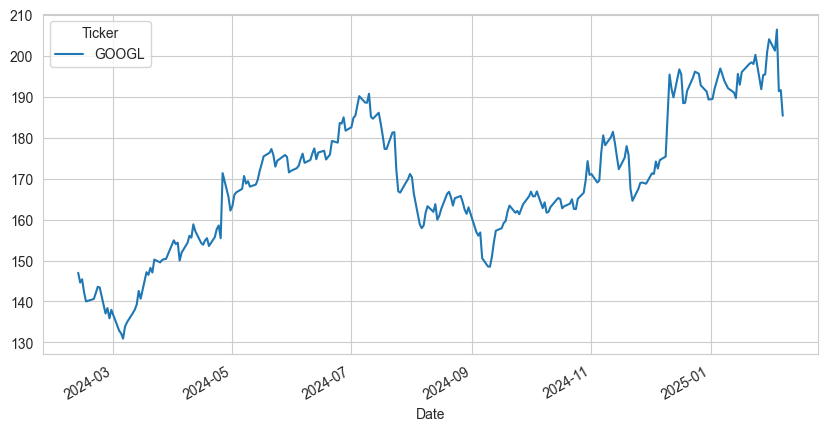

In [74]:
GOOGL['Adj Close'].plot(legend = True, figsize = (10, 5))

<Axes: xlabel='Date'>

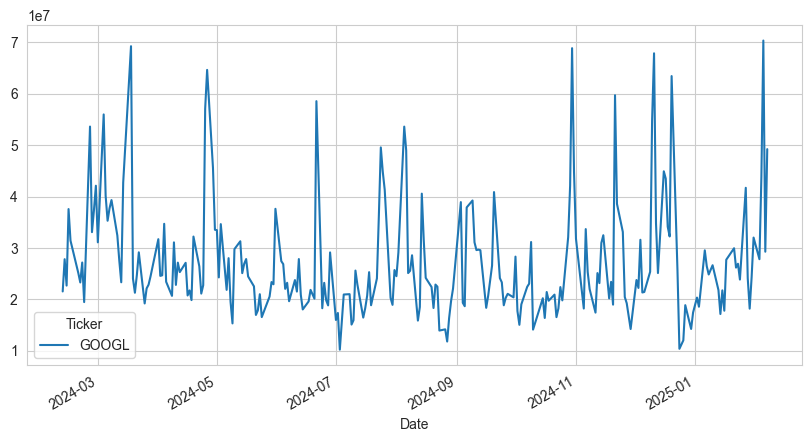

In [75]:
GOOGL['Volume'].plot(legend = True, figsize = (10, 5))

After a strong rally in early 2024, GOOGL's stock price has shown fluctuations, recently stabilizing around $190-$200. However, trading volume has seen significant spikes, particularly in mid-2024 and early 2025, indicating periods of strong market activity.

#### Calculating Moving Averages
Moving averages are technical indicators used by investors in the stock market. A moving average (MA) represents the sum of the closing prices of a security over a specific number of periods divided by the total number of periods. If a moving average is rising, it can signal a stock is in an uptrend.

In [76]:
averages = [10,25,50]
for avg in averages:
    label = "Avg for %s days" %(str(avg))
    GOOGL[label] = GOOGL['Adj Close'].rolling(window = avg, center = False).mean()

In [77]:
GOOGL.tail()

Price,Adj Close,Close,High,Low,Open,Volume,Avg for 10 days,Avg for 25 days,Avg for 50 days
Ticker,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL,,,
Date,,,,,,,,,
2025-02-03,201.229996,201.229996,203.750000,200.100006,200.690002,27838300,198.325000,195.0740,187.783034
2025-02-04,206.380005,206.380005,207.050003,202.809998,203.389999,43856400,199.158000,195.5052,188.352313
2025-02-05,191.330002,191.330002,192.750000,188.029999,191.070007,70373900,198.454001,195.4480,188.663342
2025-02-06,191.600006,191.600006,192.100006,188.720001,189.500000,29297400,197.816002,195.4624,189.146580
2025-02-07,185.339996,185.339996,191.179993,183.240005,191.050003,49246800,196.329001,195.3040,189.561952


<Axes: xlabel='Date'>

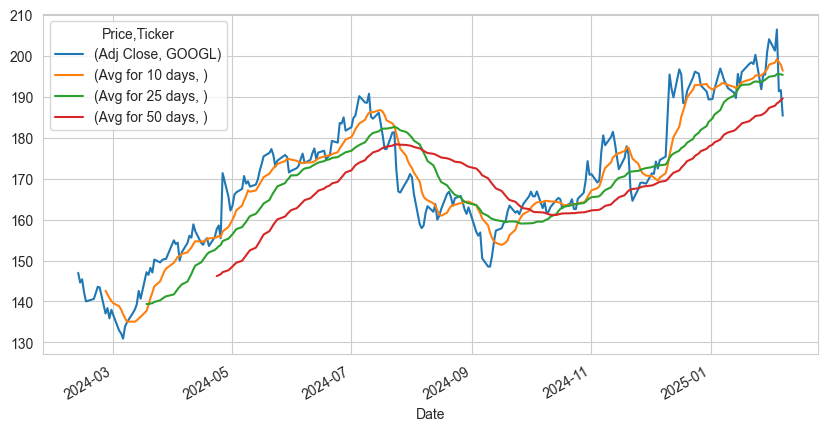

In [79]:
GOOGL[['Adj Close', 'Avg for 10 days', 'Avg for 25 days', 'Avg for 50 days']].plot(subplots = False, figsize = (10,5))

The 50-day moving average (red line) supports our earlier observation that GOOGL’s stock price has stabilized around $190-$200 in recent months. The moving averages also highlight key crossover points, indicating potential trend reversals—such as the bullish crossover in late 2024, which preceded the latest uptrend.

Now, let’s calculate the average daily returns to further analyze GOOGL’s stock performance.

#### Daily Return Averages

In [80]:
# The daily return column can be created by using the percentage change over the adjusted closing price
GOOGL['Daily Return'] = GOOGL['Adj Close'].pct_change()
GOOGL.tail()

Price,Adj Close,Close,High,Low,Open,Volume,Avg for 10 days,Avg for 25 days,Avg for 50 days,Daily Return
Ticker,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL,,,,
Date,,,,,,,,,,
2025-02-03,201.229996,201.229996,203.750000,200.100006,200.690002,27838300,198.325000,195.0740,187.783034,-0.013675
2025-02-04,206.380005,206.380005,207.050003,202.809998,203.389999,43856400,199.158000,195.5052,188.352313,0.025593
2025-02-05,191.330002,191.330002,192.750000,188.029999,191.070007,70373900,198.454001,195.4480,188.663342,-0.072924
2025-02-06,191.600006,191.600006,192.100006,188.720001,189.500000,29297400,197.816002,195.4624,189.146580,0.001411
2025-02-07,185.339996,185.339996,191.179993,183.240005,191.050003,49246800,196.329001,195.3040,189.561952,-0.032672


<Axes: xlabel='Date'>

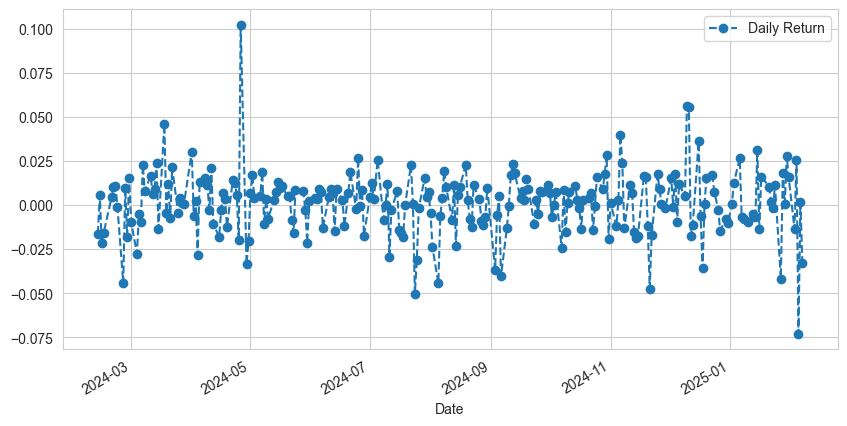

In [81]:
GOOGL['Daily Return'].plot(figsize = (10, 5), legend = True, linestyle = "--", marker = 'o')

C:\Users\ashut\AppData\Local\Temp\ipykernel_19656\1307338480.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(GOOGL['Daily Return'].dropna(), bins = 100, color = 'red')


<Axes: xlabel='Daily Return', ylabel='Density'>

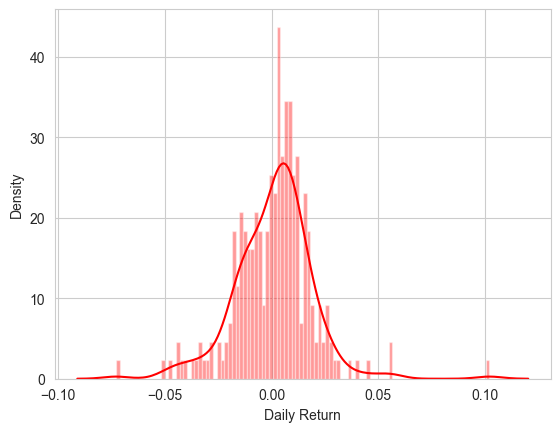

In [82]:
sns.distplot(GOOGL['Daily Return'].dropna(), bins = 100, color = 'red')

Using Seaborn to plot our axes, we find that the distribution of daily returns is concentrated heavily around 0 with little skew toward positive or negative returns.

#### Correlation between Different Daily Stock Returns

Now let's examine the trend between some pairs of the 'FAANG' stocks using Seaborn's joint plot feature, using the percent change of daily returns.

In [83]:
close_comp = yf.download(stock_list, start, end, auto_adjust = False)['Adj Close']
returns_comp = close_comp.pct_change()
returns_comp.tail()

[*********************100%***********************]  5 of 5 completed


Ticker,AAPL,AMZN,GOOGL,META,NFLX
Date,,,,,
2025-02-03,-0.033856,-0.001094,-0.013675,0.012014,0.002232
2025-02-04,0.021008,0.019543,0.025593,0.009649,0.016273
2025-02-05,-0.001418,-0.024333,-0.072924,0.000966,0.016324
2025-02-06,0.003226,0.011263,0.001411,0.010101,0.004520
2025-02-07,-0.023969,-0.040531,-0.032672,0.003553,-0.001723


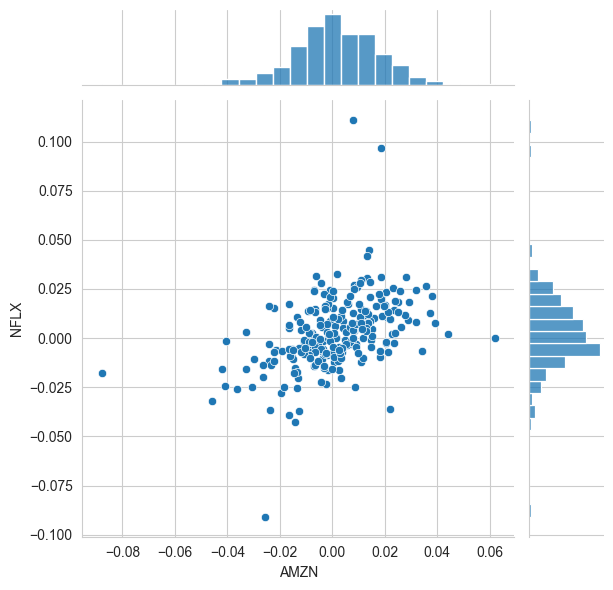

In [84]:
sns.jointplot(x=returns_comp['AMZN'], y=returns_comp['NFLX'], kind='scatter')

There seems to be a moderate correlation between Netflix and Apple returns. I'll generate all of the pairwise plots to see if there are any stronger correlations.

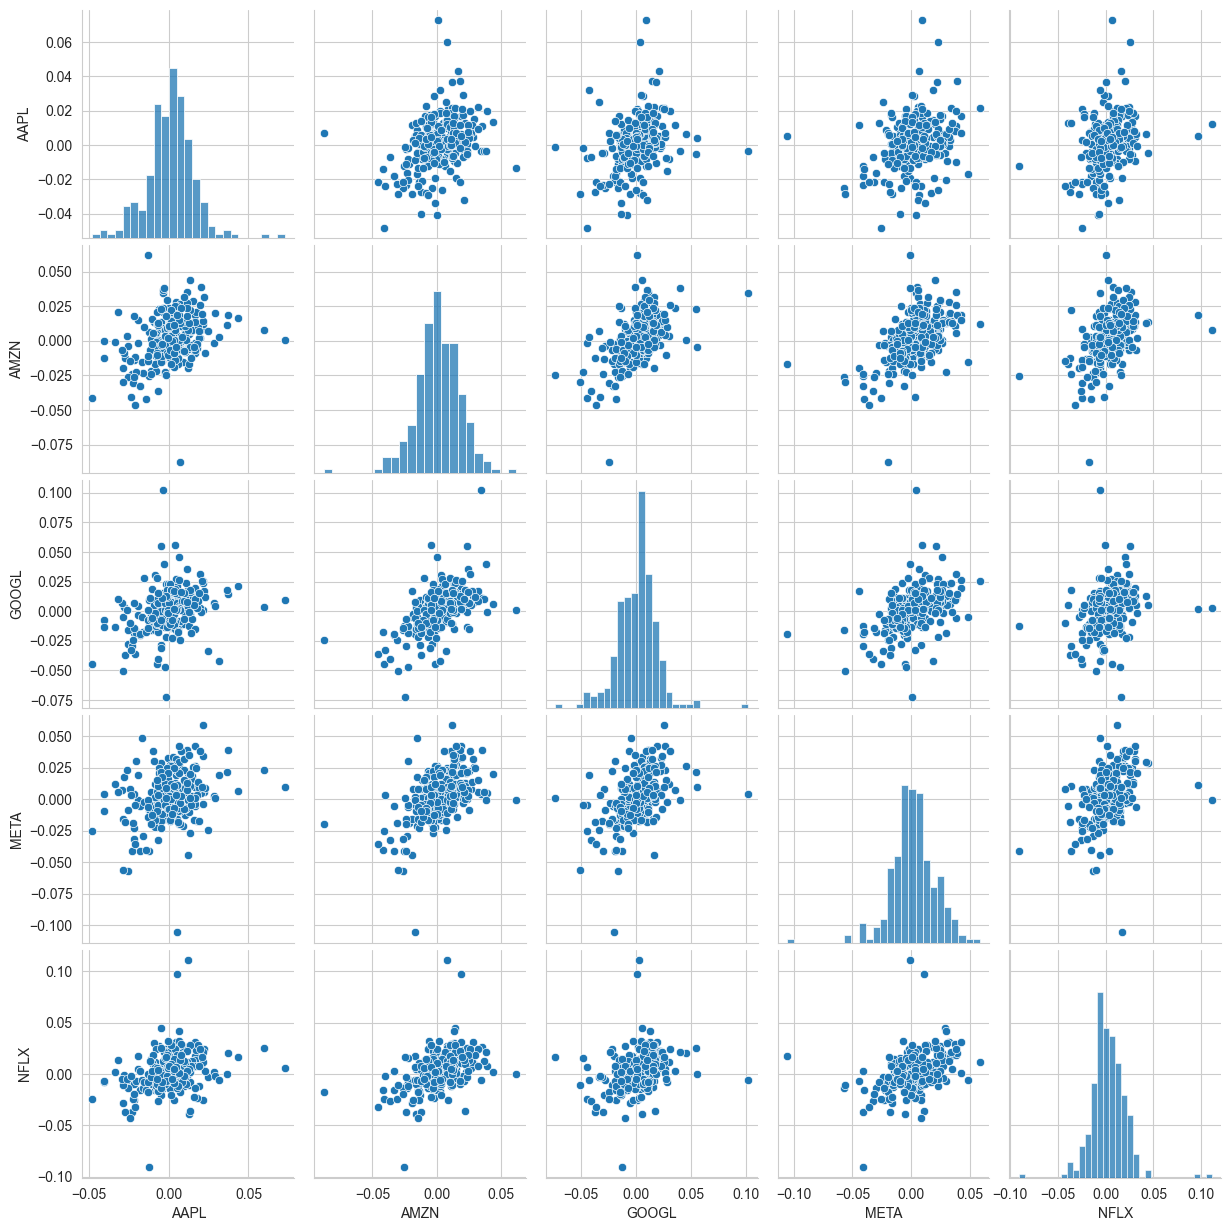

In [85]:
sns.pairplot(returns_comp.dropna())

There seems to be stronger correlations between GOOGL & AMZN, though to be sure we need another visualization tool. The correlation matrix plot, which allows us to view the pairwise confidence intervals together, is a great option for doing this.

Ticker      AAPL      AMZN     GOOGL      META      NFLX
Ticker                                                  
AAPL    1.000000  0.345957  0.317767  0.276398  0.300480
AMZN    0.345957  1.000000  0.551326  0.523273  0.439801
GOOGL   0.317767  0.551326  1.000000  0.433054  0.286742
META    0.276398  0.523273  0.433054  1.000000  0.402337
NFLX    0.300480  0.439801  0.286742  0.402337  1.000000


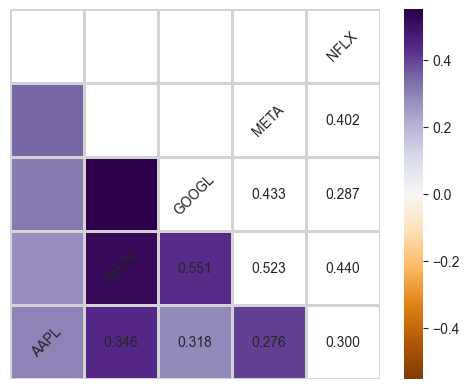

In [86]:
corr = returns_comp.corr()
print(corr)

# Generate a mask for the upper Triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Setup the matplotlib figure
fig, ax = plt.subplots()

# Draw the heatmap with mask and correct aspect ratio
vmax = np.abs(corr.values[~mask]).max()
sns.heatmap(corr, mask = mask, cmap = plt.cm.PuOr, vmin = -vmax, vmax = vmax, square = True, linecolor = "lightgray", linewidths = 1, ax = ax)

for i in range(len(corr)):
    ax.text(i + 0.5, len(corr) - (i + 0.5), corr.columns[i], ha = "center", va = "center", rotation = 45)
    for j in range(i + 1, len(corr)):
        s = "{:.3f}".format(corr.values[i, j])
        ax.text(j + 0.5, len(corr) - (i + 0.5), s, ha = "center", va = "center")
ax.axis("off")
plt.show()

From the correlation heatmap, it becomes clear that GOOGL and AMZN share a stronger correlation, and in general, AMZN maintains the strongest pairwise aggregate correlations compared to the rest of the 'FAANG' companies. Though perhaps expected, it is noteworthy that all five companies pairwise have moderate to strong positive correlations.

#### Determining Value from Risk vs. Expected Return
Now we address the question of risk in buying stocks to compare these five companies.

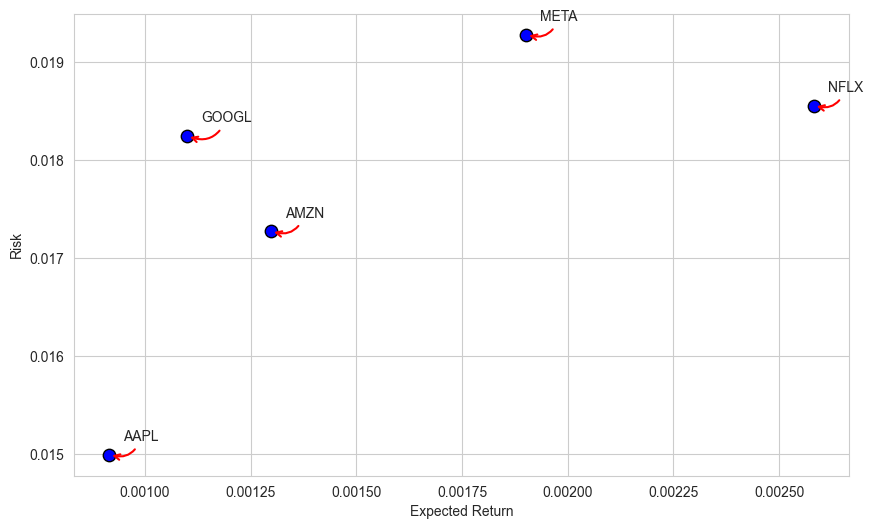

In [87]:
returns_filled = returns_comp.dropna()
plt.figure(figsize = (10, 6))

plt.scatter(returns_filled.mean(), returns_filled.std(), s=80, color = 'blue', edgecolors = 'black')

plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label,x,y in zip(returns_filled.columns, returns_filled.mean(), returns_filled.std()):
    plt.annotate(
    label,
    xy = (x, y), xytext = (10, 10),
    textcoords = 'offset points',
    arrowprops = dict(arrowstyle='->',connectionstyle = 'arc3, rad=-0.5', color = 'red', lw = 1.5))

Netflix (NFLX) has the highest expected return but also the highest risk, making it a high-risk, high-reward investment. Apple (AAPL) has the lowest risk, making it the safest and most stable option. Meta (META) and Google (GOOGL) offer moderate returns with some volatility, while Amazon (AMZN) provides a balanced mix of risk and return.

We want to model an additional value-at-risk metric in order to assess the value at each risk confidence interval for these 5 companies. Let's try this two ways: bootstrapping and using Monte Carlo-GBM, with Google.

In [88]:
returns_comp.head()

Ticker,AAPL,AMZN,GOOGL,META,NFLX
Date,,,,,
2024-02-12,NaN,NaN,NaN,NaN,NaN
2024-02-13,-0.011274,-0.021469,-0.016200,-0.018725,-0.005969
2024-02-14,-0.004810,0.013876,0.005512,0.028601,0.044741
2024-02-15,-0.001575,-0.006901,-0.021721,0.022714,0.024390
2024-02-16,-0.008430,-0.001708,-0.015760,-0.022127,-0.016025


In [89]:
returns_comp['GOOGL'].quantile(q = 0.05)

np.float64(-0.028991534476710518)

In [90]:
returns_comp['GOOGL'].quantile(q = 0.01)

np.float64(-0.0460447679061466)

From the empirical quantiles given for both intervals, we know that the worst possible loss will not exceed 2.89 percent with 95% confidence and 4.6 percent with 99% confidence.

### Predicting Future Risk and Value of Stocks
We run the Monte Carlo Method on the GBM model to assess the stability and predict the future risk of our stocks. For this component, I'll be analyzing Google's stock.

In [91]:
days = 365

#delta t
dt = 1/365

mu = returns_comp.mean()['GOOGL'] # The historical average daily return for Google

sigma = returns_comp.std()['GOOGL'] # The standard deviation (volatility) of Google's returns


def stock_monte_carlo(start_price, days, mu ,sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        
        #Shock and drift formulas taken from the Monte Carlo formula
        shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        
        drift[x] = mu * dt
        
        #New price = Old price + Old price*(shock+drift)
        price[x] = price[x-1] + (price[x-1] * (drift[x]+shock[x]))
        
    return price

We’re going to run 100 Monte Carlo simulations of Google stocks. Here's the stock's opening values again:

In [92]:
GOOGL.head()

Price,Adj Close,Close,High,Low,Open,Volume,Avg for 10 days,Avg for 25 days,Avg for 50 days,Daily Return
Ticker,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL,,,,
Date,,,,,,,,,,
2024-02-12,146.997116,147.529999,149.339996,147.369995,148.419998,21564100,NaN,NaN,NaN,NaN
2024-02-13,144.615753,145.139999,146.669998,143.690002,144.919998,27837700,NaN,NaN,NaN,-0.016200
2024-02-14,145.412872,145.940002,146.520004,144.089996,146.080002,22704200,NaN,NaN,NaN,0.005512
2024-02-15,142.254318,142.770004,143.520004,140.460007,143.139999,37590700,NaN,NaN,NaN,-0.021721
2024-02-16,140.012451,140.520004,143.190002,140.139999,142.990005,31451100,NaN,NaN,NaN,-0.015760


Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

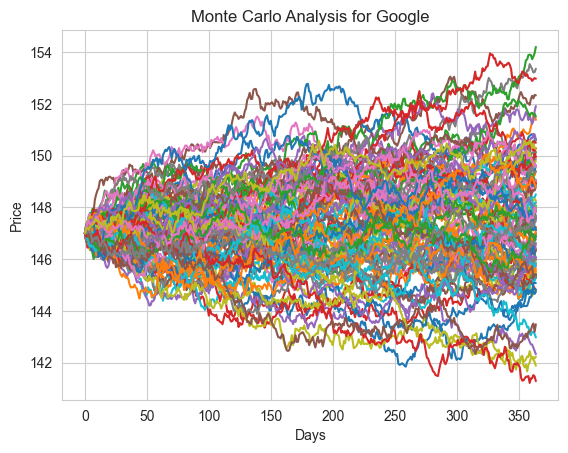

In [93]:
start_price = 146.997116 #Taken from above

for run in range(1,100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))

plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

Text(0.5, 1.0, 'Final price distribution for Google Stock after 365 days')

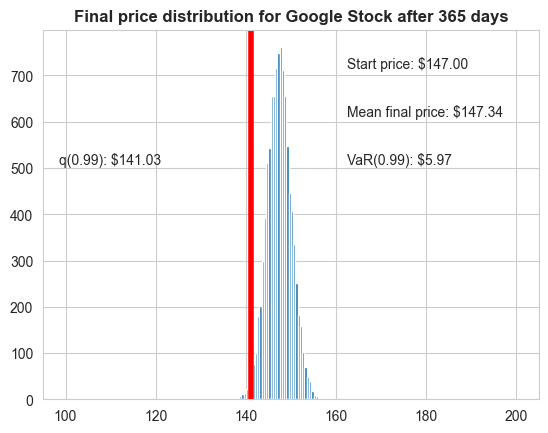

In [94]:
runs = 10000

simulations = np.zeros(runs)

for run in range(1, runs):
    simulations[run] = stock_monte_carlo(start_price, days, mu, sigma)[days-1]
q = np.percentile(simulations,1)

plt.hist(simulations, bins = 200, range = [100, 200])

plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)

plt.figtext(0.6, 0.7,"Mean final price: $%.2f" % simulations.mean())

plt.figtext(0.6, 0.6,"VaR(0.99): $%.2f" % (start_price -q,))

plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

plt.axvline(x = q, linewidth = 4, color = 'r')

plt.title(u"Final price distribution for Google Stock after %s days" %days, weight = 'bold')

Based on the histogram, we conclude that Google's stock price is relatively stable, with only a USD 0.29 difference between the starting price (USD 147.00) and the mean final price (USD 147.29) after 365 days. The Value-at-Risk (VaR) at 99% confidence is USD 5.92, meaning there is a 1% chance that the stock price could drop below USD 141.08 within the given timeframe. This suggests a low-risk investment, with a relatively narrow distribution of final stock prices, reinforcing the stability of Google's stock.